drawing
saving mp4



KeyboardInterrupt



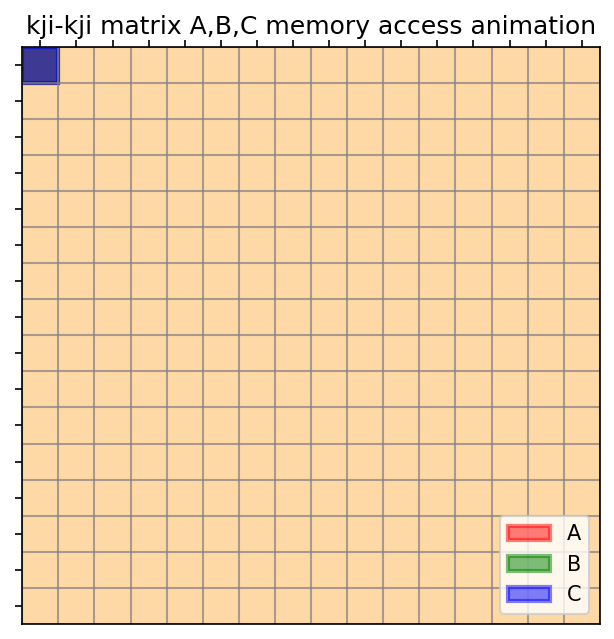

In [7]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# if you are not mac user, remove the line below
#matplotlib.use('MacOSX')

# if you are not mac user, replace 'h264_videotoolbox' to 'h264'
FFMPEG_CODEC = 'h264_videotoolbox'
# how many frames per seconds, 1 is slowest, 100 or more is the fastest
VIDEO_SPEED = 15
frame_interval =  100/VIDEO_SPEED
import time
start_time = time.time()
# Parameters
n = 16  # Matrix size (n x n)
BLOCK_SIZE = 8

# Initialize access matrices to store the access pattern
access_A = np.zeros((n, n))

# Simulate the memory access of dgemm6_kji2 function
def dgemm_kji2_simulation(n, BLOCK_SIZE, tracks):
    for k in range(0, n, BLOCK_SIZE):
        for j in range(0, n, BLOCK_SIZE):
            for i in range(0, n, BLOCK_SIZE):
                for kk in range(k, min(k + BLOCK_SIZE, n)):
                    for jj in range(j, min(j + BLOCK_SIZE, n)):
                        for ii in range(i, min(i + BLOCK_SIZE, n)):
                            # A,B,C 's (x,y) coords
                            tracks.append(((ii, kk),(kk,jj),(ii,jj)))

def dgemm_ikj2_simulation(n, BLOCK_SIZE, tracks):
    for i in range(0, n, BLOCK_SIZE):
        for k in range(0, n, BLOCK_SIZE):
            for j in range(0, n, BLOCK_SIZE):
                for ii in range(i, min(i + BLOCK_SIZE, n)):
                    for kk in range(k, min(k + BLOCK_SIZE, n)):
                        for jj in range(j, min(j + BLOCK_SIZE, n)):
                            tracks.append(((ii, kk),(kk,jj),(ii,jj)))
def dgemm_ijk2_simulation(n, BLOCK_SIZE, tracks):
    for i in range(0, n, BLOCK_SIZE):
            for j in range(0, n, BLOCK_SIZE):
                for k in range(0, n, BLOCK_SIZE):
                    for ii in range(i, min(i + BLOCK_SIZE, n)):
                        for jj in range(j, min(j + BLOCK_SIZE, n)):
                            for kk in range(k, min(k + BLOCK_SIZE, n)):
                                tracks.append(((ii, kk),(kk,jj),(ii,jj)))
                            

def dgemm_ijk_unblock_simulation(n, BLOCK_SIZE, tracks):
    for i in range(0, n):
            for j in range(0, n):
                for k in range(0, n):
                                tracks.append(((i, k),(k,j),(i,j)))
def dgemm_ikj_unblock_simulation(n, BLOCK_SIZE, tracks):
    for i in range(0, n):
        for k in range(0, n):
            for j in range(0, n):
                tracks.append(((i, k),(k,j),(i,j)))
                
def dgemm_kji_unblock_simulation(n, BLOCK_SIZE, tracks):
    for k in range(0, n):
        for j in range(0, n):
            for i in range(0, n):
                    tracks.append(((i, k),(k,j),(i,j)))
                
# Create an animation of the memory access pattern
fig, ax = plt.subplots(figsize=(6, 5),dpi=900/6)

# Pre-create the grid and matrix plot
matrix = np.zeros((n, n))
cmap = plt.get_cmap('Pastel1')
im = ax.imshow(matrix, cmap=cmap, vmin=-1, vmax=1)

# Draw grid lines only once
for i in range(n + 1):
    ax.axhline(i - 0.5, color='grey', lw=1, alpha=0.7)
    ax.axvline(i - 0.5, color='grey', lw=1, alpha=0.7)

# Set up the axes
ax.set_xticks(np.arange(n))
ax.set_yticks(np.arange(n))
ax.xaxis.tick_top()
ax.yaxis.tick_left()
ax.set_xticklabels([])
ax.set_yticklabels([])

# Create a rectangle to highlight the current cell
rectR = plt.Rectangle((-0.5, -0.5), 1, 1, linewidth=2, edgecolor='red', facecolor='red', alpha=0.5,label='A')
rectG = plt.Rectangle((-0.5, -0.5), 1, 1, linewidth=2, edgecolor='green', facecolor='green', alpha=0.5,label='B')
rectB = plt.Rectangle((-0.5, -0.5), 1, 1, linewidth=2, edgecolor='blue', facecolor='blue', alpha=0.5, label='C')
rects = [rectR, rectG,rectB]
for rect in rects:
    ax.add_patch(rect)
ax.legend(loc='lower right')

def update(poses):
    # Update the position of the rectangle instead of redrawing everything
    for rect, posi in zip(rects, poses):
        rect.set_xy((posi[1] - 0.5, posi[0] - 0.5))

def draw_kji():
    print("drawing")
    plt.title("kji-kji matrix A,B,C memory access animation")
    ani = animation.FuncAnimation(fig, update,frames=tracks_kji, repeat=False)
    print("saving mp4")
    FFwriter = animation.FFMpegWriter(fps=VIDEO_SPEED,codec=FFMPEG_CODEC)
    ani.save('animation_kji_b{}_spd{}.mp4'.format(BLOCK_SIZE,VIDEO_SPEED), writer = FFwriter)
def draw_ikj():
    print("drawing")
    plt.title("ikj-ikj matrix A,B,C memory access animation")
    ani = animation.FuncAnimation(fig, update,frames=tracks_kji, repeat=False)
    print("saving mp4")
    FFwriter = animation.FFMpegWriter(fps=VIDEO_SPEED,codec=FFMPEG_CODEC)
    ani.save('animation_ikj_b{}_spd{}.mp4'.format(BLOCK_SIZE,VIDEO_SPEED), writer = FFwriter)
def draw_ijk():
    print("drawing")
    plt.title("ijk-ijk matrix A,B,C memory access animation")
    ani = animation.FuncAnimation(fig, update, frames=tracks_ijk, repeat=False)
    print("saving ijk mp4")
    FFwriter = animation.FFMpegWriter(fps=VIDEO_SPEED,codec=FFMPEG_CODEC)
    ani.save('animation_ijk_b{}_spd{}.mp4'.format(BLOCK_SIZE,VIDEO_SPEED), writer = FFwriter)

def draw_ijk_unblock(tracks):
    print("drawing")
    plt.title("ijk unblocked matrix A,B,C memory access animation")
    ani = animation.FuncAnimation(fig, update, frames=tracks, repeat=False)
    print("saving ijk mp4")
    FFwriter = animation.FFMpegWriter(fps=VIDEO_SPEED,codec=FFMPEG_CODEC)
    ani.save('animation_unlocked_ijk_spd{}.mp4'.format(BLOCK_SIZE,VIDEO_SPEED), writer = FFwriter)

def draw_kij_unblock(tracks):
    print("drawing")
    plt.title("kij unblocked matrix A,B,C memory access animation")
    ani = animation.FuncAnimation(fig, update, frames=tracks, repeat=False)
    print("saving kij mp4")
    FFwriter = animation.FFMpegWriter(fps=VIDEO_SPEED,codec=FFMPEG_CODEC)
    ani.save('animation_unlocked_ijk_spd{}.mp4'.format(BLOCK_SIZE,VIDEO_SPEED), writer = FFwriter)

def draw_kji_unblock(tracks):
    print("drawing")
    plt.title("kji unblocked matrix A,B,C memory access animation")
    ani = animation.FuncAnimation(fig, update, frames=tracks, repeat=False)
    print("saving kji mp4")
    FFwriter = animation.FFMpegWriter(fps=VIDEO_SPEED,codec=FFMPEG_CODEC)
    ani.save('animation_unlocked_kji_spd{}.mp4'.format(BLOCK_SIZE,VIDEO_SPEED), writer = FFwriter)

#drawing block versions of  BLOCK_SIZE and  grid size 16
BLOCK_SIZE=4
tracks_kji = []
dgemm_kji2_simulation(n, BLOCK_SIZE, tracks_kji)
draw_kji()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Script execution time: {elapsed_time:.2f} seconds")
start_time = time.time()
tracks_ikj = []
dgemm_ikj2_simulation(n, BLOCK_SIZE, tracks_ikj)
draw_ikj()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Script execution time: {elapsed_time:.2f} seconds")
start_time = time.time()
tracks_ijk = []
dgemm_ijk2_simulation(n, BLOCK_SIZE, tracks_ijk)
draw_ijk()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Script execution time: {elapsed_time:.2f} seconds")
# drawing unblocked versions
tracks_unblock_ijk = []
dgemm_ijk_unblock_simulation(n, BLOCK_SIZE, tracks_unblock_ijk)
start_time = time.time()
draw_ijk_unblock(tracks_unblock_ijk)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Script execution time: {elapsed_time:.2f} seconds")
tracks_unblock_kji = []
dgemm_kji_unblock_simulation(n, BLOCK_SIZE, tracks_unblock_kji)
start_time = time.time()
draw_kji_unblock(tracks_unblock_kji)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Script execution time: {elapsed_time:.2f} seconds")

tracks_unblock_kij = []
dgemm_kij_unblock_simulation(n, BLOCK_SIZE, tracks_unblock_kij)
start_time = time.time()
draw_kij_unblock(tracks_unblock_kij)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Script execution time: {elapsed_time:.2f} seconds")


In [10]:
import numpy as np
import cv2
import time

# Parameters
n = 16  # Matrix size (n x n)
BLOCK_SIZE = 8
VIDEO_SPEED = 15  # Frames per second
FRAME_INTERVAL = 100 / VIDEO_SPEED
FRAME_SIZE = 900  # Size of the frame in pixels
CELL_SIZE = FRAME_SIZE // n  # Size of each cell

# Colors for different matrices
COLOR_A = (0, 0, 255)  # Red
COLOR_B = (0, 255, 0)  # Green
COLOR_C = (255, 0, 0)  # Blue

# Initialize access matrices to store the access pattern
access_A = np.zeros((n, n))

# Simulate the memory access of dgemm functions
def dgemm_kji2_simulation(n, BLOCK_SIZE, tracks):
    for k in range(0, n, BLOCK_SIZE):
        for j in range(0, n, BLOCK_SIZE):
            for i in range(0, n, BLOCK_SIZE):
                for kk in range(k, min(k + BLOCK_SIZE, n)):
                    for jj in range(j, min(j + BLOCK_SIZE, n)):
                        for ii in range(i, min(i + BLOCK_SIZE, n)):
                            # A, B, C 's (x,y) coords
                            tracks.append(((ii, kk), (kk, jj), (ii, jj)))

def dgemm_ikj2_simulation(n, BLOCK_SIZE, tracks):
    for i in range(0, n, BLOCK_SIZE):
        for k in range(0, n, BLOCK_SIZE):
            for j in range(0, n, BLOCK_SIZE):
                for ii in range(i, min(i + BLOCK_SIZE, n)):
                    for kk in range(k, min(k + BLOCK_SIZE, n)):
                        for jj in range(j, min(j + BLOCK_SIZE, n)):
                            tracks.append(((ii, kk), (kk, jj), (ii, jj)))

def dgemm_ijk2_simulation(n, BLOCK_SIZE, tracks):
    for i in range(0, n, BLOCK_SIZE):
        for j in range(0, n, BLOCK_SIZE):
            for k in range(0, n, BLOCK_SIZE):
                for ii in range(i, min(i + BLOCK_SIZE, n)):
                    for jj in range(j, min(j + BLOCK_SIZE, n)):
                        for kk in range(k, min(k + BLOCK_SIZE, n)):
                            tracks.append(((ii, kk), (kk, jj), (ii, jj)))


def dgemm_ijk_unblock_simulation(n, tracks):
    for i in range(0, n):
            for j in range(0, n):
                for k in range(0, n):
                                tracks.append(((i, k),(k,j),(i,j)))
import sys


# Draw the animation using OpenCV
def draw_simulation(tracks, title, output_filename):
    print(f"Drawing: {title}")
    if sys.platform == "darwin":
        fourcc = cv2.VideoWriter_fourcc(*'AVC1')
    else:  
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
    video_writer = cv2.VideoWriter(output_filename, fourcc, VIDEO_SPEED, (FRAME_SIZE, FRAME_SIZE))

    for poses in tracks:
        # Create a blank frame
        frame = np.ones((FRAME_SIZE, FRAME_SIZE, 3), dtype=np.uint8) * 255

        # Draw the grid lines
        for i in range(n + 1):
            cv2.line(frame, (i * CELL_SIZE, 0), (i * CELL_SIZE, FRAME_SIZE), (200, 200, 200), 1)
            cv2.line(frame, (0, i * CELL_SIZE), (FRAME_SIZE, i * CELL_SIZE), (200, 200, 200), 1)

        # Draw rectangles for each matrix (A, B, C)
        for (posi, color) in zip(poses, [COLOR_A, COLOR_B, COLOR_C]):
            x, y = posi[1], posi[0]
            top_left = (x * CELL_SIZE, y * CELL_SIZE)
            bottom_right = ((x + 1) * CELL_SIZE, (y + 1) * CELL_SIZE)
            cv2.rectangle(frame, top_left, bottom_right, color, thickness=-1)

        # Add title to the frame
        cv2.putText(frame, title, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

        # Add legend to the frame
        cv2.rectangle(frame, (10, FRAME_SIZE - 80), (30, FRAME_SIZE - 60), COLOR_A, -1)
        cv2.putText(frame, 'A', (40, FRAME_SIZE - 65), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2, cv2.LINE_AA)
        cv2.rectangle(frame, (10, FRAME_SIZE - 55), (30, FRAME_SIZE - 35), COLOR_B, -1)
        cv2.putText(frame, 'B', (40, FRAME_SIZE - 40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2, cv2.LINE_AA)
        cv2.rectangle(frame, (10, FRAME_SIZE - 30), (30, FRAME_SIZE - 10), COLOR_C, -1)
        cv2.putText(frame, 'C', (40, FRAME_SIZE - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2, cv2.LINE_AA)

        # Write the frame to the video
        video_writer.write(frame)

    # Release the video writer
    video_writer.release()
    print(f"Saved animation to {output_filename}")

# Run the simulation
BLOCK_SIZE = 4

start_time = time.time()
tracks_ijk = []
dgemm_ijk_unblock_simulation(n, tracks_ijk)
draw_simulation(tracks_ijk, "ijk unblocked matrix A,B,C memory access animation", f"animation_unblock_ijk_b{BLOCK_SIZE}_spd{VIDEO_SPEED}.mp4")
end_time = time.time()
print(f"Script execution time: {end_time - start_time:.2f} seconds")
# Simulation kji
start_time = time.time()
tracks_kji = []
dgemm_kji2_simulation(n, BLOCK_SIZE, tracks_kji)
draw_simulation(tracks_kji, "kji-kji matrix A,B,C memory access animation", f"animation_kji_b{BLOCK_SIZE}_spd{VIDEO_SPEED}.mp4")
end_time = time.time()
print(f"Script execution time: {end_time - start_time:.2f} seconds")

# Simulation ikj
start_time = time.time()
tracks_ikj = []
dgemm_ikj2_simulation(n, BLOCK_SIZE, tracks_ikj)
draw_simulation(tracks_ikj, "ikj-ikj matrix A,B,C memory access animation", f"animation_ikj_b{BLOCK_SIZE}_spd{VIDEO_SPEED}.mp4")
end_time = time.time()
print(f"Script execution time: {end_time - start_time:.2f} seconds")

# Simulation ijk
start_time = time.time()
tracks_ijk = []
dgemm_ijk2_simulation(n, BLOCK_SIZE, tracks_ijk)
draw_simulation(tracks_ijk, "ijk-ijk matrix A,B,C memory access animation", f"animation_ijk_b{BLOCK_SIZE}_spd{VIDEO_SPEED}.mp4")
end_time = time.time()
print(f"Script execution time: {end_time - start_time:.2f} seconds")


Drawing: kji-kji matrix A,B,C memory access animation


OpenCV: FFMPEG: tag 0x31435641/'AVC1' is not supported with codec id 27 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x31637661/'avc1'


Saved animation to animation_kji_b4_spd15.mp4
Script execution time: 7.26 seconds
Drawing: ikj-ikj matrix A,B,C memory access animation


OpenCV: FFMPEG: tag 0x31435641/'AVC1' is not supported with codec id 27 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x31637661/'avc1'


Saved animation to animation_ikj_b4_spd15.mp4
Script execution time: 7.14 seconds
Drawing: ijk-ijk matrix A,B,C memory access animation


OpenCV: FFMPEG: tag 0x31435641/'AVC1' is not supported with codec id 27 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x31637661/'avc1'


Saved animation to animation_ijk_b4_spd15.mp4
Script execution time: 7.28 seconds
